In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from collections import Counter
from string import punctuation
from matplotlib import rcParams
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [13]:
message = pd.read_json('accenture.json')
message

,Title,Date,Link
0,"[World Economic Forum, Accenture and EPRI Laun...","November 03, 2021",https://newsroom.accenture.com/news/world-econ...
1,[Accenture Acquires BCS Consulting to Strength...,"October 28, 2021",https://newsroom.accenture.com/news/accenture-...
2,[CEOs Unequivocally Call for Bold Government A...,"October 31, 2021",https://newsroom.accenture.com/news/ceos-unequ...
3,[Accenture Positioned as a Leader in IDC Marke...,"November 01, 2021",https://newsroom.accenture.com/news/accenture-...
4,[More than Half of Organizations Not Effective...,"November 03, 2021",https://newsroom.accenture.com/news/more-than-...
...,...,...,...
4865,[Accenture Collaborates with Chubu Electric Po...,"August 09, 2021",https://newsroom.accenture.com/news/accenture-...
4866,[National Wildlife Federation Expands Its “Gar...,"August 03, 2021",https://newsroom.accenture.com/news/national-w...
4867,[Accenture Named a Leader in ‘Salesforce Consu...,"August 03, 2021",https://newsroom.accenture.com/news/accenture-...
4868,[Global Cyber Intrusion Activity More than Dou...,"August 04, 2021",https://newsroom.accenture.com/news/global-cyb...


In [14]:
a = message.Title.values
b = [i for i in a if i not in ['[', ']']]
messages = pd.DataFrame(b, columns=['Title'])
messages

,Title
0,"World Economic Forum, Accenture and EPRI Launc..."
1,Accenture Acquires BCS Consulting to Strengthe...
2,CEOs Unequivocally Call for Bold Government Ac...
3,Accenture Positioned as a Leader in IDC Market...
4,More than Half of Organizations Not Effectivel...
...,...
4865,Accenture Collaborates with Chubu Electric Pow...
4866,National Wildlife Federation Expands Its “Gard...
4867,Accenture Named a Leader in ‘Salesforce Consul...
4868,Global Cyber Intrusion Activity More than Doub...


In [15]:
nlp = spacy.load("en_core_web_sm")

In [16]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        
        elif(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [17]:
message_text = str(messages.Title.values)
output = get_hotwords(message_text)
words = [x for x in Counter(output).most_common(30)]

In [18]:
words

[('accenture', 6),
 ('consulting', 2),
 ('services', 2),
 ('capabilities', 2),
 ('research', 2),
 ('global', 2),
 ('world', 1),
 ('economic', 1),
 ('forum', 1),
 ('epri', 1),
 ('launch', 1),
 ('initiative', 1),
 ('transition', 1),
 ('industrial', 1),
 ('clusters', 1),
 ('net', 1),
 ('bcs', 1),
 ('u.k', 1),
 ('financial', 1),
 ('technology', 1),
 ('bold', 1),
 ('government', 1),
 ('action', 1),
 ('consistent', 1),
 ('climate', 1),
 ('policy', 1),
 ('cop26', 1),
 ('latest', 1),
 ('sustainability', 1),
 ('un', 1)]

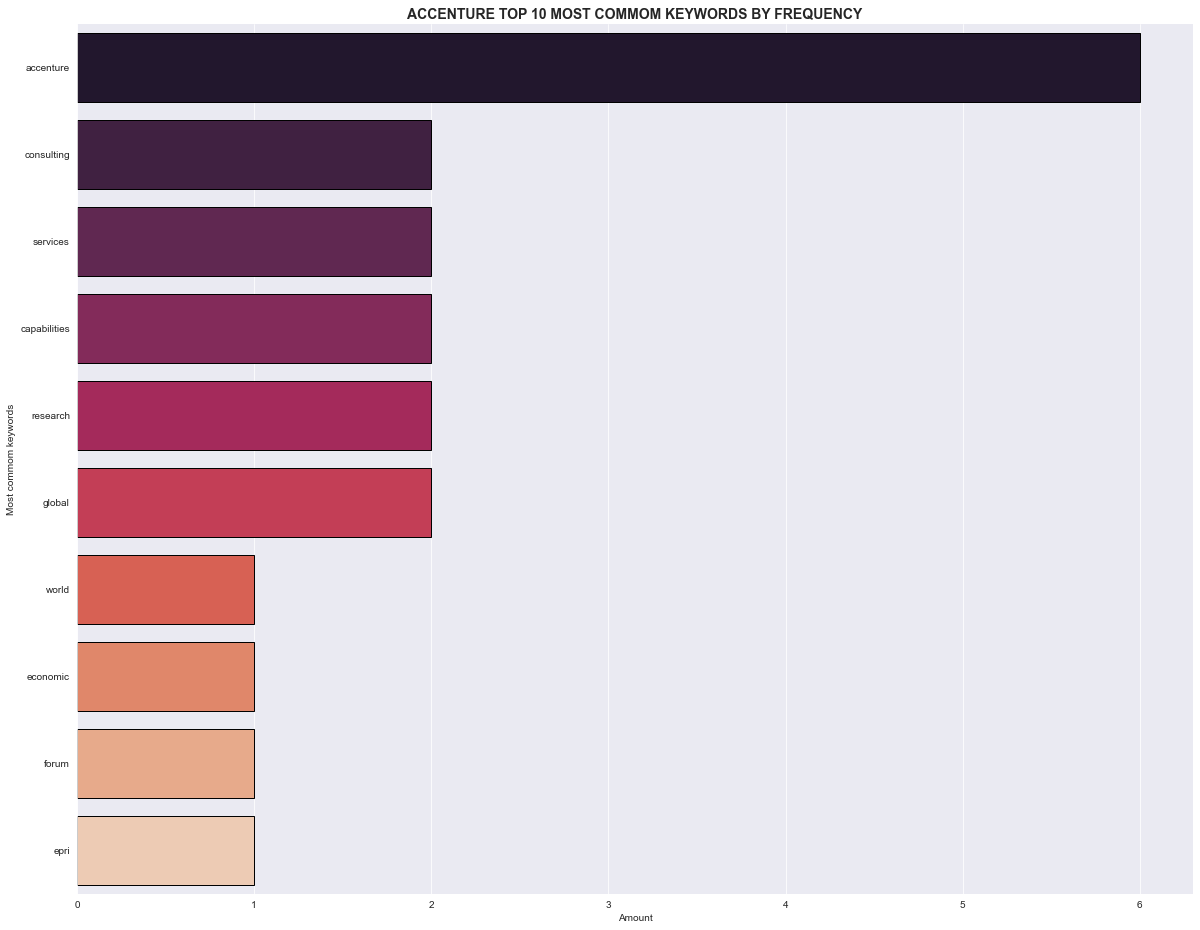

In [19]:
df = pd.DataFrame(words, columns =['Most commom keywords', 'Amount'])
rcParams['figure.figsize'] = 20,16
sns.set_style('darkgrid')
ax = sns.barplot(x='Amount', y='Most commom keywords', data= df[:10], palette='rocket', edgecolor='k')
ax.set_title('ACCENTURE TOP 10 MOST COMMOM KEYWORDS BY FREQUENCY', fontsize=14, weight='bold')
ax.set_xlabel('Amount')
sns.despine();
plt.savefig('accenture_keywords.png')

In [20]:
doc = list(nlp(message_text).noun_chunks)

In [21]:
import sys

orig_stdout = sys.stdout
f = open(
    'accenture.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Accenture' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [22]:
df = pd.read_table(
    'accenture.txt', 
    header=None,
    encoding= 'cp1252'
)
df.rename(
    columns={
        0: 'Accenture'
    },
    inplace=True, 
    errors='raise'
)
dff = pd.DataFrame(
    data=df.Accenture.value_counts()
).rename(
    columns={'Accenture': 'Frequency'}
).rename_axis(
    'Term'
)
dff.head()

,Frequency
Term,
Accenture,3
Accenture’s Cyber Incident Response Update',1
'Salt River Project Teams,1


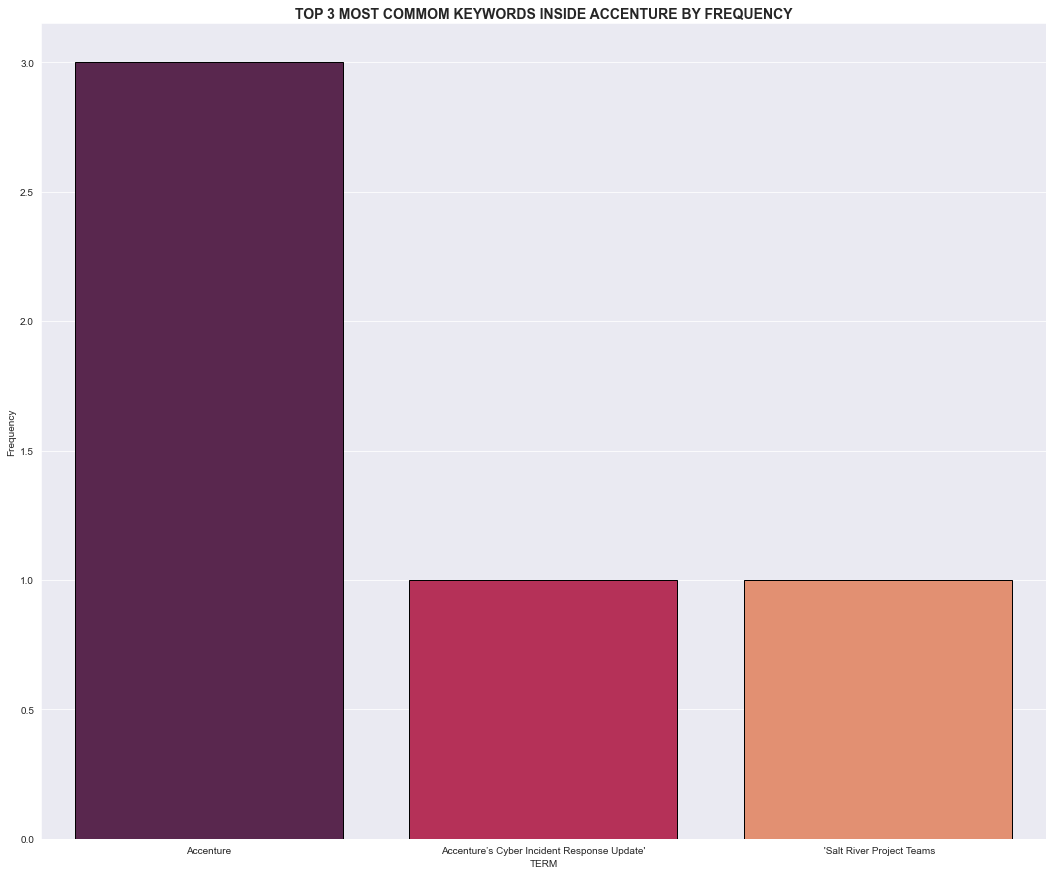

In [23]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff[:6], 
    x=dff.index[:6], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 3 MOST COMMOM KEYWORDS INSIDE ACCENTURE BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'most_commom_keyword.png'
)

In [24]:
orig_stdout = sys.stdout
f = open(
    'consulting.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Consulting' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [25]:
df2 = pd.read_table(
    'consulting.txt', 
    header=None,
    encoding= 'cp1252'
)
df2.rename(
    columns={
        0: 'Consulting'
    },
    inplace=True, 
    errors='raise'
)
dff2 = pd.DataFrame(
    data=df2.Consulting.value_counts()
).rename(
    columns={'Consulting': 'Frequency'}
).rename_axis(
    'Term'
)
dff2.head()

,Frequency
Term,
its U.K. Financial Services Consulting,1
Salesforce Consulting Partners’ Report,1


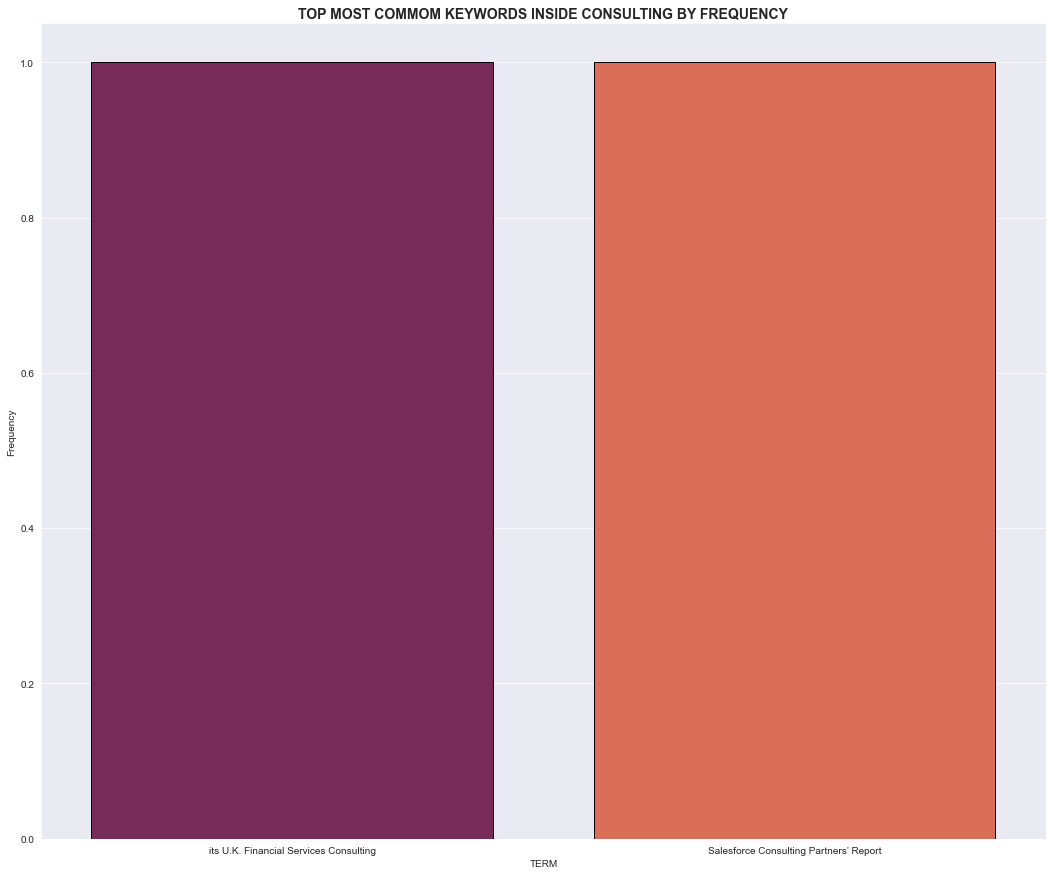

In [26]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff2[:7], 
    x=dff2.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST COMMOM KEYWORDS INSIDE CONSULTING BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'second_most_commom_keyword.png'
)

In [27]:
orig_stdout = sys.stdout
f = open(
    'services.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Services' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [28]:
df3 = pd.read_table(
    'services.txt', 
    header=None,
    encoding= 'cp1252'
)
df3.rename(
    columns={
        0: 'Services'
    },
    inplace=True, 
    errors='raise'
)
dff3 = pd.DataFrame(
    data=df3.Services.value_counts()
).rename(
    columns={'Services': 'Frequency'}
).rename_axis(
    'Term'
)
dff3.head()

,Frequency
Term,
its U.K. Financial Services Consulting,1
Services Capabilities,1


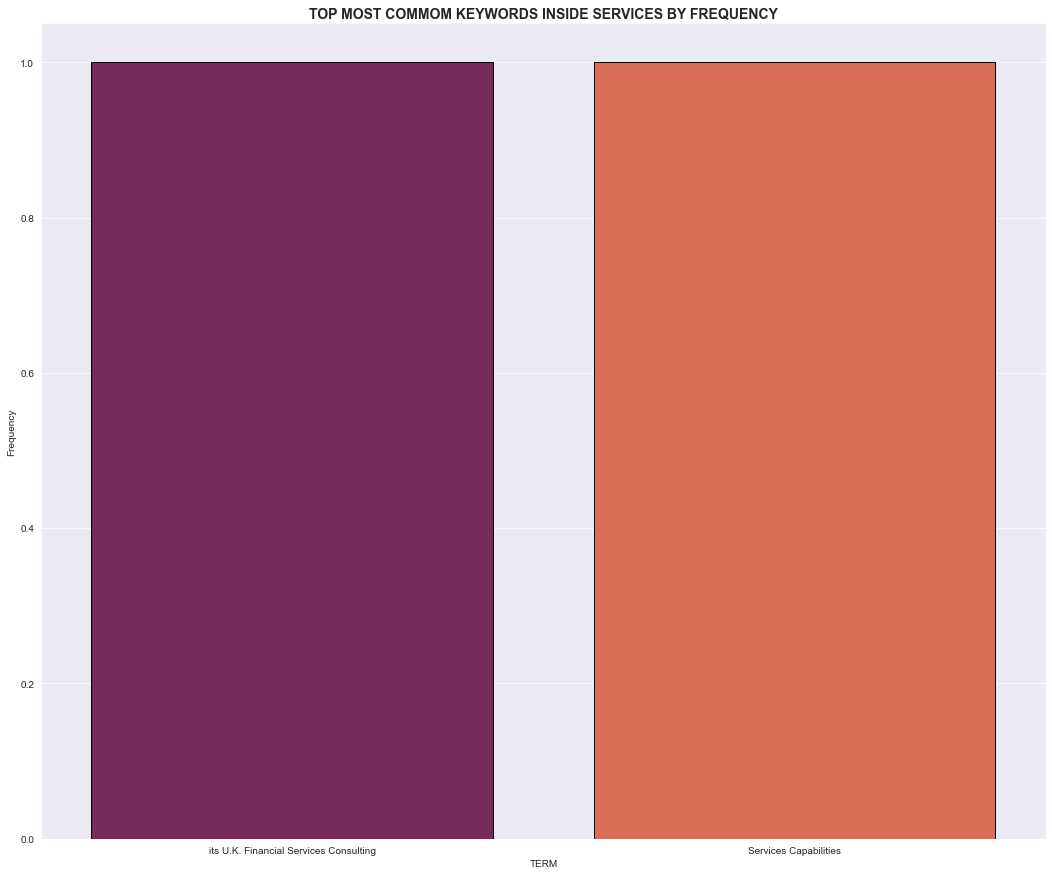

In [29]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff3[:7], 
    x=dff3.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST COMMOM KEYWORDS INSIDE SERVICES BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'third_most_commom_keyword.png'
)

In [32]:
orig_stdout = sys.stdout
f = open(
    'capabilities.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Capabilities' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [33]:
df4 = pd.read_table(
    'capabilities.txt', 
    header=None
)
df4.rename(
    columns={
        0: 'Capabilities'
    },
    inplace=True, 
    errors='raise'
)
dff4 = pd.DataFrame(
    data=df4.Capabilities.value_counts()
).rename(
    columns={'Capabilities': 'Frequency'}
).rename_axis(
    'Term'
)
dff4.head()

,Frequency
Term,
Services Capabilities,1


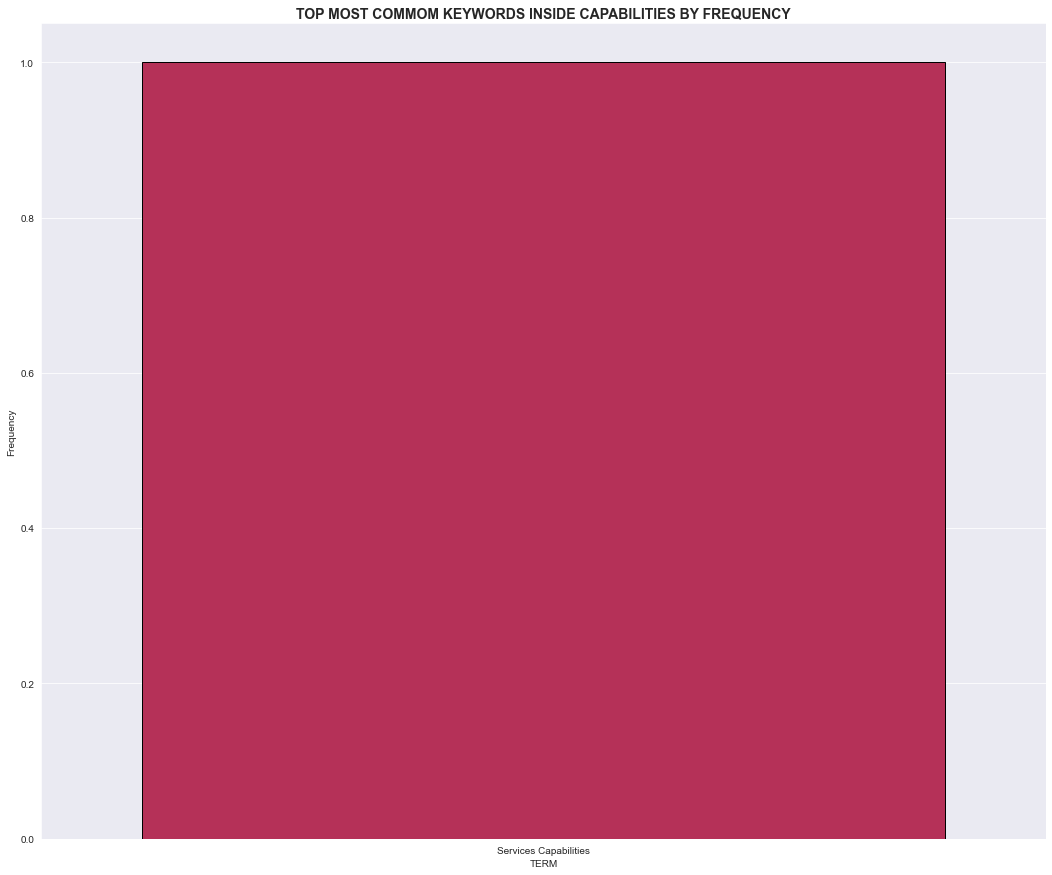

In [34]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff4[:5], 
    x=dff4.index[:5], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST COMMOM KEYWORDS INSIDE CAPABILITIES BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fourth_most_commom_keyword.png'
)

In [35]:
orig_stdout = sys.stdout
f = open(
    'research.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Research' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [36]:
df5 = pd.read_table(
    'research.txt', 
    header=None,
    encoding= 'cp1252'
)
df5.rename(
    columns={
        0: 'Research'
    },
    inplace=True, 
    errors='raise'
)
dff5 = pd.DataFrame(
    data=df5.Research.value_counts()
).rename(
    columns={'Research': 'Frequency'}
).rename_axis(
    'Term'
)
dff5.head()

,Frequency
Term,
Latest Sustainability Research,1
Independent Research Firm,1


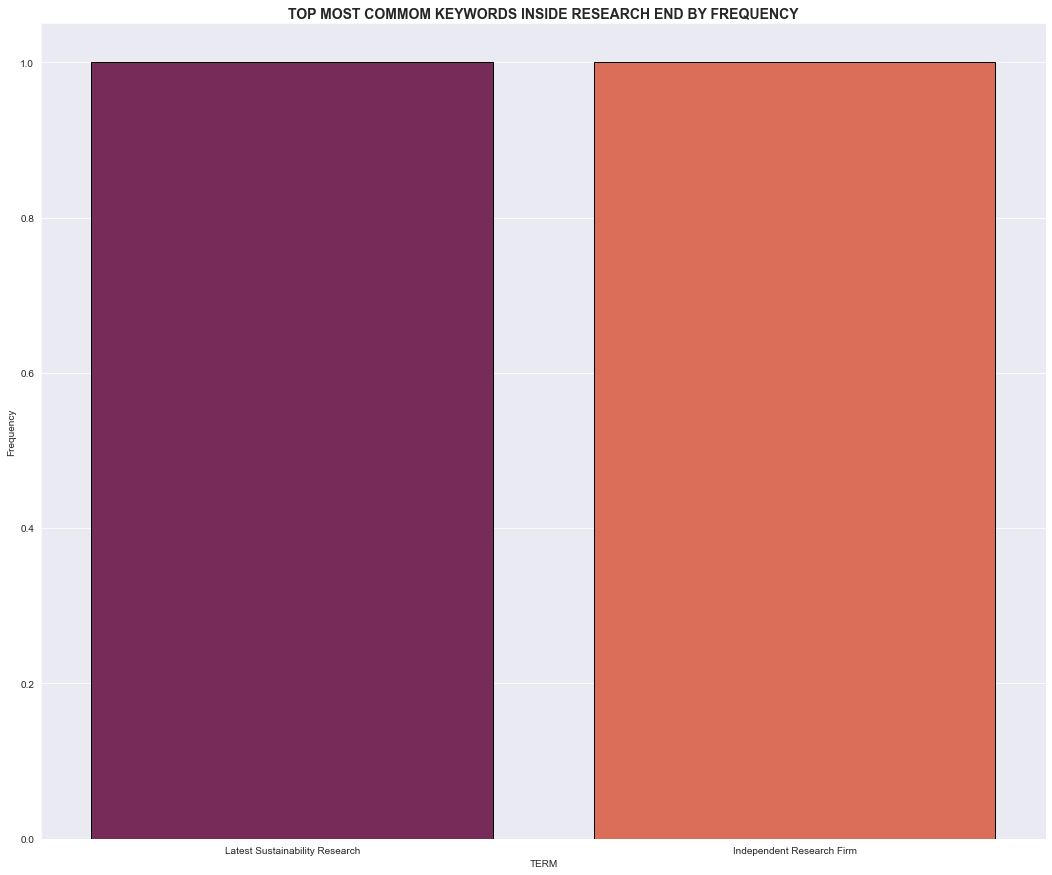

In [37]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff5[:6], 
    x=dff5.index[:6], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST COMMOM KEYWORDS INSIDE RESEARCH END BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fifth_most_commom_keyword.png'
)

In [38]:
orig_stdout = sys.stdout
f = open(
    'global.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Global' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [39]:
df6 = pd.read_table(
    'global.txt', 
    header=None,
    encoding= 'cp1252'
)
df6.rename(
    columns={
        0: 'Global'
    },
    inplace=True, 
    errors='raise'
)
dff6 = pd.DataFrame(
    data=df6.Global.value_counts()
).rename(
    columns={'Global': 'Frequency'}
).rename_axis(
    'Term'
)
dff6.head()

,Frequency
Term,
the UN Global Compact,1
Global Cyber Intrusion Activity,1


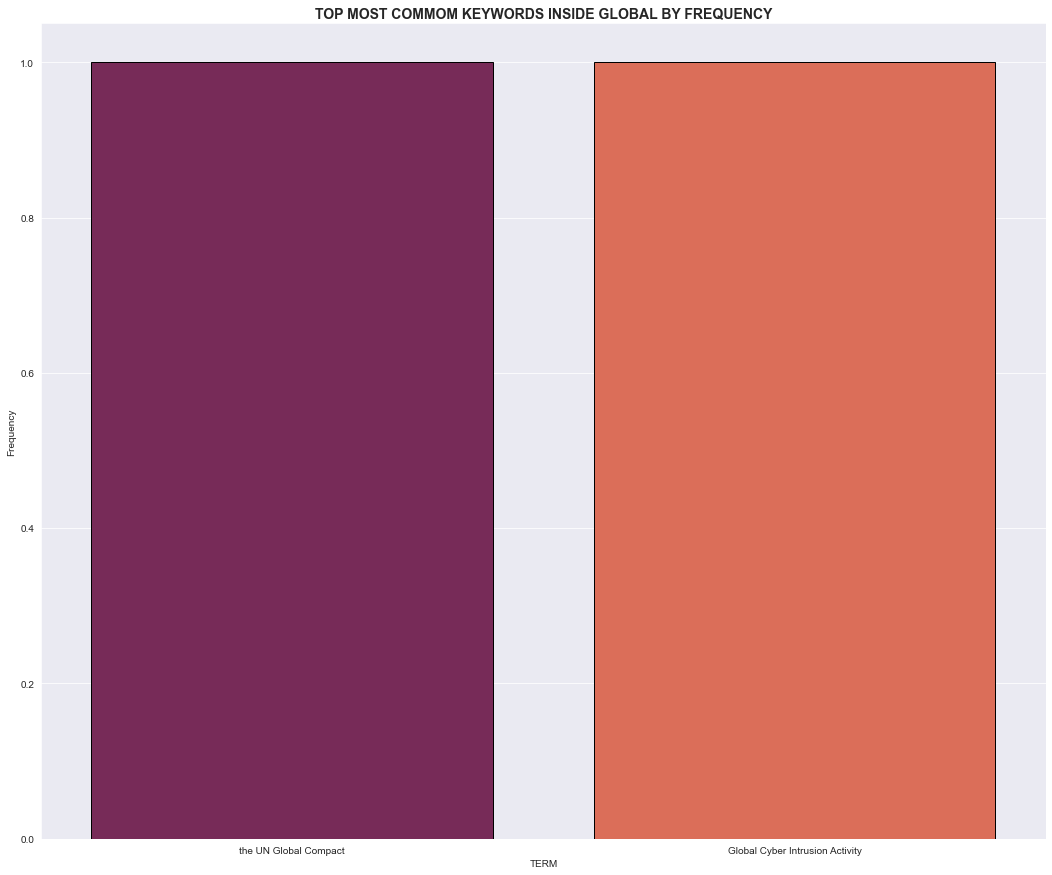

In [40]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff6[:5], 
    x=dff6.index[:5], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST COMMOM KEYWORDS INSIDE GLOBAL BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'sixth_most_commom_keyword.png'
)